In [1]:
# Башкатов ППМ-17-1
# Лаба 3 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame = False);
fullData = load_breast_cancer();
#Creatind DataFrame
df = pd.DataFrame(data = X, columns = fullData.feature_names);

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [5]:
#Splitting data to train and test sets
from sklearn import model_selection 
X_train, X_test, y_train, y_test = model_selection.train_test_split(fullData.data, fullData.target, test_size=0.33, random_state=0) 

In [6]:
#Standardization
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(n_estimators=200)
adaBoost.fit(X_train_std, y_train)
y_pred = adaBoost.predict(X_test_std)

In [8]:
from sklearn.model_selection import cross_val_score
scores = model_selection.cross_val_score(adaBoost, X_train_std, y_train, cv=10, scoring='roc_auc')
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  

[1.         0.9826087  1.         0.93043478 0.97391304 1.
 0.97916667 1.         1.         0.99702381]
Accuracy: 0.99 (+/- 0.04)


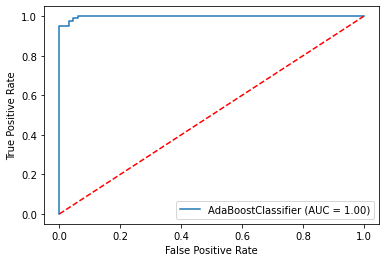

In [9]:

from sklearn.metrics import plot_roc_curve
adaBoost_disp = plot_roc_curve(adaBoost, X_test_std, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [10]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(C=100, random_state=0, max_iter=5000)
logReg.fit(X_train_std,y_train)
y_pred = logReg.predict(X_test_std)

In [11]:
scores = cross_val_score(logReg, X_train_std, y_train, cv=10, scoring='roc_auc')
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[1.         0.99130435 1.         0.95652174 0.9826087  1.
 1.         1.         1.         1.        ]
Accuracy: 0.99 (+/- 0.03)


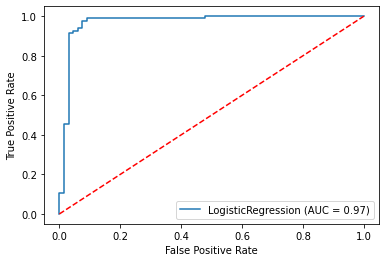

In [12]:
logReg_disp = plot_roc_curve(logReg, X_test_std, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [13]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)
decTree.fit(X_train_std,y_train)
y_pred = decTree.predict(X_test_std)

In [14]:
scores = cross_val_score(decTree, X_train_std, y_train, cv=10, scoring='roc_auc')
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[0.93333333 0.86811594 0.94492754 0.87826087 0.93333333 1.
 0.89285714 0.97916667 0.9375     0.90178571]
Accuracy: 0.93 (+/- 0.08)


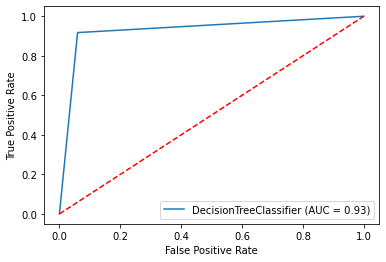

In [15]:
decTree_disp = plot_roc_curve(decTree, X_test_std, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [16]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kNeighbors = KNeighborsClassifier(n_neighbors=5)
kNeighbors.fit(X_train_std,y_train)
y_pred = kNeighbors.predict(X_test_std)

In [17]:
scores = cross_val_score(kNeighbors, X_train_std, y_train, cv=10, scoring='roc_auc')
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[1.         0.99275362 1.         0.92753623 0.95652174 1.
 0.99255952 1.         1.         0.95238095]
Accuracy: 0.98 (+/- 0.05)


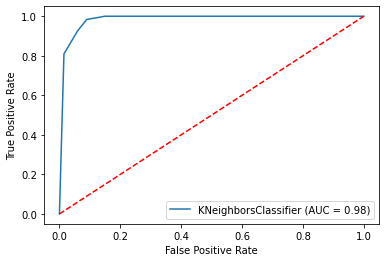

In [18]:
kNeighbors_disp = plot_roc_curve(kNeighbors, X_test_std, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

In [19]:
# Voting
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('LogisticRegression', logReg), ('DecisionTree', decTree),('KNeighbors',kNeighbors)],voting='soft')
vote.fit(X_train_std, y_train)
y_pred = vote.predict(X_test_std)


In [20]:
scores = cross_val_score(vote, X_train_std, y_train, cv=10, scoring='roc_auc')
print (scores)              
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[1.         0.9884058  1.         0.95652174 0.97681159 1.
 1.         1.         1.         1.        ]
Accuracy: 0.99 (+/- 0.03)


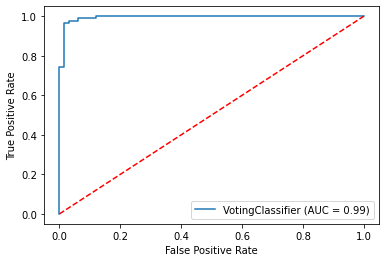

In [21]:
vote_disp = plot_roc_curve(vote, X_test_std, y_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

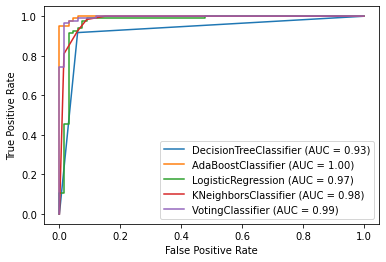

In [22]:
for classificators in [decTree, adaBoost, logReg, kNeighbors, vote]:
  ax = plt.gca()
  plot_roc_curve(classificators, X_test_std, y_test, ax=ax)

In [23]:
#  РСА
from sklearn import decomposition
pca = decomposition.PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
pca.explained_variance_ratio_

array([4.55771744e-01, 1.76893931e-01, 9.34975674e-02, 6.37104081e-02,
       5.91481881e-02, 4.03627476e-02, 2.62714857e-02, 1.78269733e-02,
       1.24678659e-02, 1.10804941e-02, 9.53315173e-03, 8.27563607e-03,
       6.58458487e-03, 5.01787836e-03, 2.92354122e-03, 2.59017097e-03,
       1.76756158e-03, 1.47732757e-03, 1.14185292e-03, 8.65392694e-04,
       7.99348062e-04, 5.62968831e-04, 3.79937214e-04, 3.68224334e-04,
       2.69712518e-04, 2.25314231e-04, 1.39820101e-04, 3.18014499e-05,
       1.09395733e-05, 3.43037408e-06])

In [24]:
adaBoost_pca = AdaBoostClassifier(n_estimators=200)
adaBoost_pca.fit(X_train_pca, y_train)
y_pred = adaBoost_pca.predict(X_test_pca)
#-----------------------------------------
logReg_pca = LogisticRegression(C=100, random_state=0, max_iter=5000)
logReg_pca.fit(X_train_pca,y_train)
y_pred = logReg_pca.predict(X_test_pca)
#-----------------------------------------
decTree_pca = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)
decTree_pca.fit(X_train_pca,y_train)
y_pred = decTree_pca.predict(X_test_std)
#-----------------------------------------
kNeighbors_pca = KNeighborsClassifier(n_neighbors=5)
kNeighbors_pca.fit(X_train_pca,y_train)
y_pred = kNeighbors_pca.predict(X_test_std)
#-----------------------------------------
vote_pca = VotingClassifier(estimators=[('LogReg', logReg_pca), (' DecTree', decTree_pca),('KNeig',kNeighbors_pca)],voting='soft')
vote_pca.fit(X_train_pca,y_train)
y_pred = vote_pca.predict(X_test_std)

In [25]:
for classificators in [adaBoost_pca, logReg_pca, decTree_pca, kNeighbors_pca, vote_pca]:
  scores = cross_val_score(clf, X_train_pca, y_train, cv=10, scoring='roc_auc')            
  print(str(classificators),"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

AdaBoostClassifier(n_estimators=200) Accuracy: 0.99 (+/- 0.03)
LogisticRegression(C=100, max_iter=5000, random_state=0) Accuracy: 0.99 (+/- 0.03)
DecisionTreeClassifier(max_depth=20, random_state=0) Accuracy: 0.90 (+/- 0.12)
KNeighborsClassifier() Accuracy: 0.98 (+/- 0.05)
VotingClassifier(estimators=[('LogReg',
                              LogisticRegression(C=100, max_iter=5000,
                                                 random_state=0)),
                             (' DecTree',
                              DecisionTreeClassifier(max_depth=20,
                                                     random_state=0)),
                             ('KNeig', KNeighborsClassifier())],
                 voting='soft') Accuracy: 0.99 (+/- 0.03)


In [26]:
for classificators in [adaBoost_pca, logReg_pca, decTree_pca, kNeighbors_pca, vote_pca]:
  ax = plt.gca()
  plot_roc_curve(classificators, X_test_pca, y_test, ax=ax)

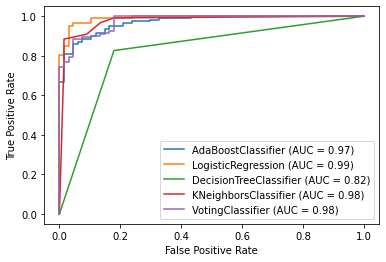

In [26]:
# Результаты уменьшения размерности хуже, но приемлемые. Дерево решений дало самый худший результат.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
randomForest=RandomForestClassifier(n_estimators=10, random_state=0)

In [28]:
# Set of DecisionTree + AdaBoost + GaussianNB
set1 = VotingClassifier(estimators=[('decTree', decTree), ('adaBoost', adaBoost), ('gauss', gauss)], voting='soft')
set1.fit(X_train_std, y_train)
scores = cross_val_score(set1, X_train_std, y_train, cv=10, scoring='roc_auc')            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.04)


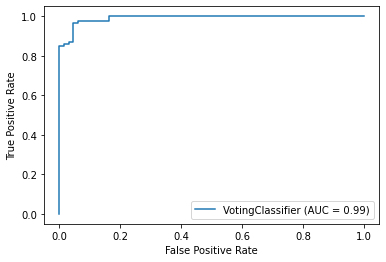

In [29]:
plot_roc_curve(set1, X_test_std, y_test)

In [30]:
# Set of DecisionTree + RandomForest + AdaBoost
set2 = VotingClassifier(estimators=[('decTree', decTree), ('randomForest', randomForest), ('adaBoost', adaBoost)], voting='soft')
set2.fit(X_train_std, y_train)
scores = cross_val_score(set2, X_train_std, y_train, cv=10, scoring='roc_auc')            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.03)


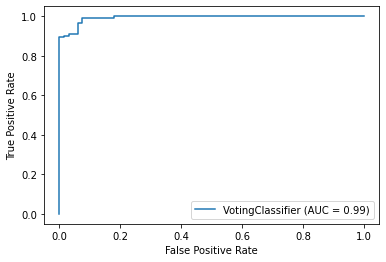

In [31]:
plot_roc_curve(set2, X_test_std, y_test)

In [32]:
# Set of DecisionTree + RandomForest + KNeighbors + LogisticRegression
set3 = VotingClassifier(estimators=[('decTree', decTree), ('randomForest', randomForest), ('kN', kNeighbors),('logReg', logReg)], voting='soft')
set3.fit(X_train_std, y_train)
scores = cross_val_score(set3, X_train_std, y_train, cv=10, scoring='roc_auc')            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.02)


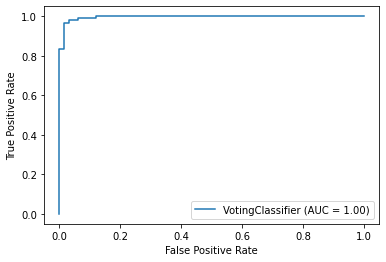

In [33]:
plot_roc_curve(set3, X_test_std, y_test)

In [34]:
# Set of DecisionTree + RandomForest + KNeighbors + LogisticRegression + AdaBoost + GaussianNB
setAllClf = VotingClassifier(estimators=[('decTree', decTree), ('kN', kNeighbors),('rForest', randomForest),('logReg', logReg),('adaBoost',adaBoost),('gauss',gauss)], voting='soft')
setAllClf.fit(X_train_std, y_train)
scores = cross_val_score(setAllClf, X_train_std, y_train, cv=10, scoring='roc_auc')            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.02)


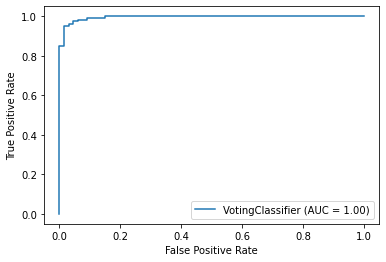

In [35]:
plot_roc_curve(setAllClf, X_test_std, y_test)

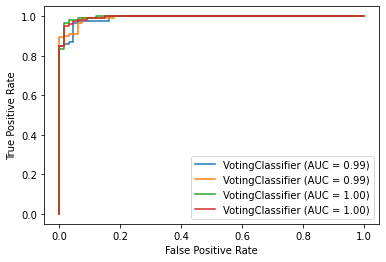

In [36]:
for classificators in [set1, set2, set3, setAllClf]:
  ax = plt.gca()
  plot_roc_curve(classificators, X_test_std, y_test, ax=ax)

In [ ]:
# По графику видно, что Набор3 и Набор всех классификаторов дал один результат. Лучше остановиться на варианте с меньшим кол-вом классификаторов для задач больших размерностей.
# Результат удалось улучшить, уменьшив разброс точности до +/- 0.02